# Simple neural network from scratch

This uses only numpy. Kudos to Niko Steinhoff (nsteinhoff on github) for developing the base for this on his phone and @iamtrask for the original code.

In [17]:
'''
This module implements a simple neural network with
variable number of hidden layers.

Todo:
    - create larger dataset
    - split train and test set
    - check test error per iteration
    - propper gradient descent
    - regularization
    - mini-batch
'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Helper functions

- We need a functions that calculates the sigmoid a a given number of array (This means projecting a natural number on the space [0,1] using an exponential function).
- We need the derivative of our function. As the function we use is the logistic function, it's derivative is x\*(1-x) if x is the result of the logistic function.
- The transform function is needed to turn the dot product of the x and the weights into a sigmoid.

In [21]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def derivative(x):
    return x * (1-x)

def transform(x, w):
    return sigmoid(np.dot(x, w))

In [ ]:
def initialize_weights(n_inputs, n_outputs, seed=123):
    np.random.seed(seed)
    return 2 * np.random.random((n_inputs, n_outputs)) - 1
    
def initialize_model(layers, seed=123):
    in_out = [(i, o) for i, o in zip(layers, layers[1:] + [1])]
    l = [initialize_weights(n_in, n_out, seed+i)
         for i, (n_in, n_out) in enumerate(in_out)]   
    return l

In [2]:
 def apply_model(model, x):
    out = [x]
    for i, w in enumerate(model):
        out.append(transform(out[i], w))
    return out

def update_model(model, outputs, y):
    error = y - outputs[-1]
    slope = derivative(outputs[-1])
    update = error * slope 
    new_weight = model[-1] + np.dot(outputs[-2].T, update)
    
    updates = [update]
    new_weights = [new_weight]
    
    for i in range(len(model)-1):
        upstream = -(i+1)
        this = upstream - 1
        downstream = this - 1
        
        back_prop = np.dot(updates[i], model[upstream].T)
        update = back_prop * derivative(outputs[this])
        new_weight = model[this] + np.dot(outputs[downstream].T, update)
        
        updates.append(update)
        new_weights.append(new_weight)
        
    return list(reversed(new_weights))

In [14]:
def train(X, y, hidden_layers=None, n_iter=1000):
    print("Training neural network... ")
    n_input = X.shape[1]
    if hidden_layers is None:
        hidden_layers = []
    layers = [n_input] + hidden_layers
    model = initialize_model(layers)
    
    print("Initial model:")
    for i, m in enumerate(model):
        print("Layer {}:".format(i+1))
        print(m)
        
    errors = []
    scores = []
    for _ in range(n_iter):
        out = apply_model(model, X)
        model = update_model(model, out, y)
        
        y_proba = out[-1]
        y_pred = (y_proba >= 0.5).astype('int')
        error = np.mean(np.abs(y - y_proba))
        accuracy = np.mean(y_pred == y)
        errors.append(error)
        scores.append(accuracy)

    stats = zip(scores, errors)
    interval = len(scores)/10
    print('')
    print("{:<6}: {:>4} {:>8}".format('iter', 'acc', 'err'))
    for i, s in enumerate(stats[::interval]):
        print("{:<6}: {:>4.2f} {:>8.4f}".format(i*interval, *s))
    plt.plot(errors)
    plt.show()
    
    print('')
    print("After training {} iterations:\nTrue vs. Pred".format(n_iter))
    print(np.column_stack((y, y_proba)))
    print('')
    print("Accuracy: {:>10.2f}".format(accuracy))
    print("Error:    {:>10.4f}".format(error))
    print('')
    print("Final model:")
    for i, m in enumerate(model):
        print("Layer {}:".format(i+1))
        print(m)

    return model

In [15]:
def test(model, X, y):
    print('')
    print("Testing neural network... ")
    out = apply_model(model, X)
    y_proba = out[-1]
    y_pred = (y_proba >= 0.5).astype('int')
    error = np.mean(np.abs(y - y_proba))
    accuracy = np.mean(y_pred == y)
    print("Accuracy: {:>10.2f}".format(accuracy))
    print("Error:    {:>10.4f}".format(error))




+=====+ START +======+
Training neural network... 
Initial model:
Layer 1:
[[ 0.39293837 -0.42772133 -0.54629709  0.10262954]
 [ 0.43893794 -0.15378708  0.9615284   0.36965948]
 [-0.0381362  -0.21576496 -0.31364397  0.45809941]]
Layer 2:
[[-0.78787019  0.49094297  0.14462707]
 [-0.08351763 -0.23058819 -0.45202139]
 [ 0.33592482 -0.20904998 -0.43685421]
 [ 0.55983941  0.19818833 -0.75410728]]
Layer 3:
[[ 0.01345202]
 [-0.88493861]
 [ 0.25515997]]

iter  :  acc      err
0     : 0.40   0.5205
1000  : 1.00   0.0191
2000  : 1.00   0.0120
3000  : 1.00   0.0094
4000  : 1.00   0.0079
5000  : 1.00   0.0070
6000  : 1.00   0.0063
7000  : 1.00   0.0058
8000  : 1.00   0.0053
9000  : 1.00   0.0050


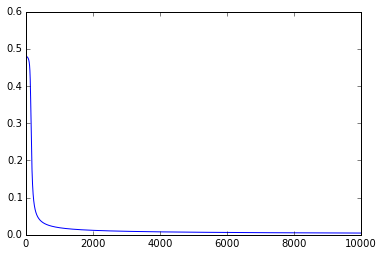


After training 10000 iterations:
True vs. Pred
[[ 0.          0.00661533]
 [ 0.          0.0053977 ]
 [ 1.          0.99857332]
 [ 1.          0.99760633]
 [ 1.          0.99223217]]

Accuracy:       1.00
Error:        0.0047

Final model:
Layer 1:
[[ 3.36734717 -2.00270805 -2.58223472 -2.2405925 ]
 [ 0.04888636  0.30219746  0.94114509  0.43121706]
 [-2.88819152  1.50998857  1.67939996  1.93694481]]
Layer 2:
[[-3.79165409 -0.48580832  6.94053974]
 [ 0.28182997  0.36885226 -0.87063071]
 [ 0.83707396  0.53063077 -1.37202519]
 [ 1.20463477  0.8630214  -1.14148084]]
Layer 3:
[[-5.05870013]
 [-1.65578295]
 [ 8.85367446]]


In [20]:
print("\n\n+{:=^20}+".format('+ START +'))
X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1],
                  [0, 0, 0]])
y = np.array([0, 0, 1, 1, 1]).reshape((-1 , 1))

model = train(X, y, hidden_layers=[4, 3], n_iter=10000)